<a href="https://colab.research.google.com/github/ANKS04UB/data-science/blob/main/Mnist_deep_learnirg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns 

In [21]:
mnist=tf.keras.datasets.mnist

In [22]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [23]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [24]:
X_train_full.shape

(60000, 28, 28)

In [25]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

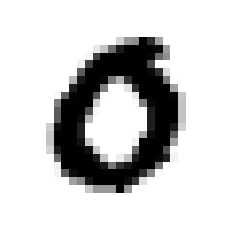

In [26]:
plt.imshow(X_train_full[8000],cmap='binary')
plt.axis('off')
plt.show()

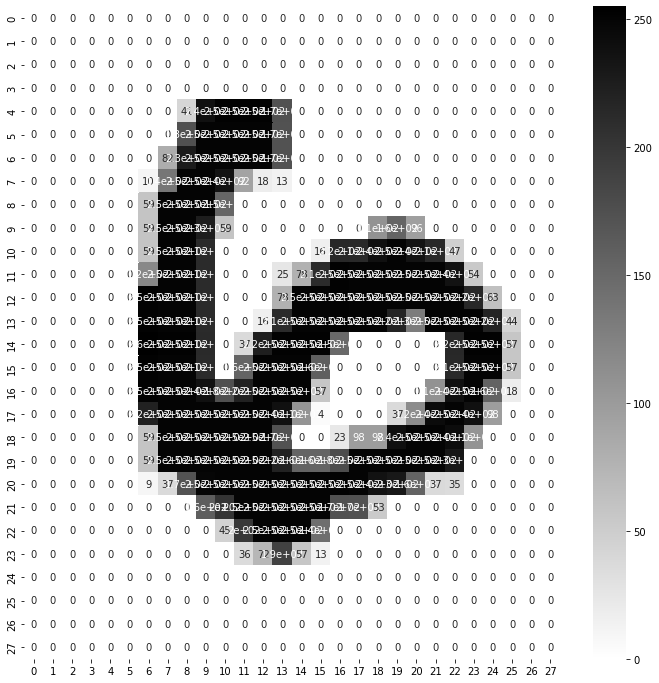

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train_full[9000],annot=True,cmap='binary')

In [28]:
X_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [29]:
X_test=X_test/255

In [30]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer1'),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2'),
        tf.keras.layers.Dense(10,activation='softmax',name='outputlayer')]

In [31]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [32]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
LOSS_FUNCTION='sparse_categorical_crossentropy'
OPTIMIZER='adam'
METRICS=['accuracy']

In [34]:
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [36]:
model_clf.layers[1].name

'hiddenlayer1'

In [37]:
hidden1=model_clf.layers[1]

In [38]:
weights,biases=hidden1.get_weights()

In [39]:
EPOCHS=5
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 7s 3ms/step - loss: 0.2115 - accuracy: 0.9367 - val_loss: 0.1015 - val_accuracy: 0.9722
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0856 - accuracy: 0.9737 - val_loss: 0.0764 - val_accuracy: 0.9770
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0564 - accuracy: 0.9816 - val_loss: 0.0754 - val_accuracy: 0.9774
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.0813 - val_accuracy: 0.9772
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9886 - val_loss: 0.0759 - val_accuracy: 0.9792


In [42]:
import time
import os
def saveModel_path(model_dir="/content/SAVED_MODEL"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName) 
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path


In [43]:
model_clf.save(saveModel_path())


your model will be saved at the following location
/content/SAVED_MODEL/Model_2023_02_03_11_29_35_.h5


In [44]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [46]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.211479,0.936673,0.101496,0.9722
1,0.085608,0.973709,0.076450,0.9770
2,0.056352,0.981582,0.075371,0.9774
3,0.041165,0.986982,0.081267,0.9772
4,0.034585,0.988582,0.075871,0.9792


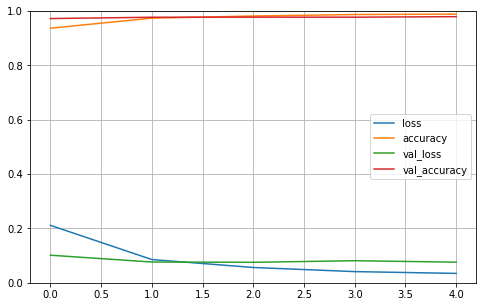

In [47]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [49]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0720 - accuracy: 0.9794


[0.0719776377081871, 0.9793999791145325]

In [50]:
prediction=model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 96ms/step


In [51]:
prediction

array([[1.4674946e-10, 1.4163692e-07, 2.7878278e-07, 1.6625978e-06,
        5.9254608e-11, 1.8874344e-09, 1.2241770e-14, 9.9999774e-01,
        1.3835050e-07, 6.6133410e-08],
       [3.5641642e-13, 5.1949886e-08, 9.9999535e-01, 4.6085838e-06,
        3.9051763e-17, 1.5817649e-11, 5.6258007e-14, 3.2098344e-14,
        8.6049239e-09, 5.2306270e-14],
       [6.0151172e-07, 9.9923956e-01, 4.2726402e-05, 5.7585584e-07,
        2.3028131e-04, 6.4021583e-06, 3.5896712e-05, 1.9103702e-04,
        2.5272381e-04, 1.6236132e-07]], dtype=float32)

In [52]:
prediction[0]

array([1.4674946e-10, 1.4163692e-07, 2.7878278e-07, 1.6625978e-06,
       5.9254608e-11, 1.8874344e-09, 1.2241770e-14, 9.9999774e-01,
       1.3835050e-07, 6.6133410e-08], dtype=float32)

In [53]:
np.argmax(prediction[0].round(5))

7

In [57]:
np.argmax(prediction[1].round(5))

2